In [1]:
import pandas as pd
import seaborn as sns
import pickle
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('brain_stroke.csv')

In [7]:
le = LabelEncoder()
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['gender'] = le.fit_transform(df['gender'])
df['age'] = df['age'].astype(int)

In [9]:
X = df.drop('stroke', axis = 'columns')
y = df.stroke

In [10]:
scaler = StandardScaler()
X_normalize = scaler.fit_transform(X)

In [11]:
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [12]:
# Create a new balanced DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Display the updated DataFrame
balanced_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,1,1,228.69,36.6,1,1
1,1,80,0,1,1,1,0,105.92,32.5,2,1
2,0,49,0,0,1,1,1,171.23,34.4,3,1
3,0,79,1,0,1,2,0,174.12,24.0,2,1
4,1,81,0,0,1,1,1,186.21,29.0,1,1


In [13]:
A = balanced_data.drop('stroke', axis = 'columns')
B = balanced_data.stroke

In [14]:
X_train, X_test, y_train, y_test = train_test_split(A,B, test_size = 0.3, random_state = 42)

In [15]:
rf = RandomForestClassifier(max_depth = 20, max_features = 'log2', n_estimators = 1000, min_samples_split = 5, min_samples_leaf = 2, criterion = 'entropy', class_weight = 'balanced', bootstrap = False)

In [16]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9341549295774648

In [17]:
y_preds = rf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm

array([[1291,  116],
       [  71, 1362]])

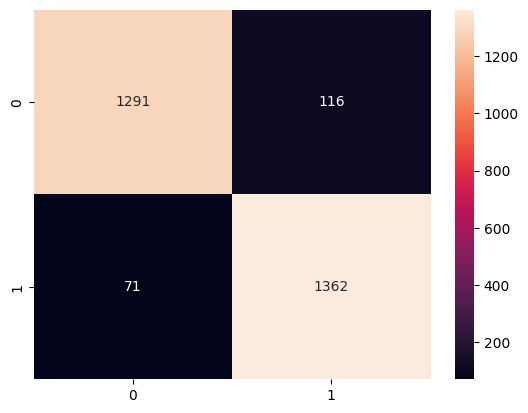

In [18]:
sns.heatmap(cm, annot = True, fmt = 'g');

In [19]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1407
           1       0.92      0.95      0.94      1433

    accuracy                           0.93      2840
   macro avg       0.93      0.93      0.93      2840
weighted avg       0.93      0.93      0.93      2840



In [ ]:
balanced_data.to_csv("Ready for ml.csv")

In [ ]:
pickle.dump(rf, open('model.pkl', 'wb'))